In [6]:
import itertools
import math
import matplotlib.pyplot as plt
import multiprocessing as mp
import time
import os

In [7]:
def stp_brute_force_parallel(cities, start_city_idx=None, num_processes=None):
    # Generate permutations on-the-fly using a generator expression
    if start_city_idx is not None:
        start_city = cities[start_city_idx]
        cities = cities[:start_city_idx] + cities[start_city_idx+1:]
        permutations = ((start_city,) + perm for perm in itertools.permutations(cities))
    else:
        permutations = ((cities[0],) + perm for perm in itertools.permutations(cities[1:]))

    # Split permutations into chunks
    perms_list = list(permutations)
    num_perms = len(perms_list)
    if num_processes is None:
        num_processes = mp.cpu_count()
    chunk_size = (num_perms + num_processes - 1) // num_processes
    perms_chunks = [perms_list[i:i + chunk_size] for i in range(0, num_perms, chunk_size)]

    # Initialize variables
    shortest_path = None
    shortest_distance = math.inf

    # Create a queue to collect results
    queue = mp.Queue()

    # Create and start processes
    processes = []
    for chunk in perms_chunks:
        process = mp.Process(target=process_chunk, args=(chunk, queue))
        processes.append(process)
        process.start()

    # Wait for processes to finish
    for process in processes:
        process.join()

    # Collect results from queue
    results = []
    while not queue.empty():
        results.append(queue.get())

    # Find shortest path and distance from results
    for result in results:
        if result[1] < shortest_distance:
            shortest_path = result[0]
            shortest_distance = result[1]

    return shortest_path, shortest_distance


def process_chunk(perms_chunk, queue):
    shortest_path = None
    shortest_distance = math.inf
    for permutation in perms_chunk:
        distance = calculate_distance(permutation)
        if distance < shortest_distance:
            shortest_path = permutation
            shortest_distance = distance
    queue.put((shortest_path, shortest_distance))


def calculate_distance(permutation):
    distance = 0
    for i in range(len(permutation) - 1):
        city1 = permutation[i]
        city2 = permutation[i + 1]
        distance += math.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

In [8]:
def plot_solution(cities, shortest_path, shortest_distance, start_index=None):
    # Plot the cities and the shortest path
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    
    # Plot the cities as blue dots
    plt.plot(x, y, 'bo')

    for i in range(len(shortest_path) - 1):
        city1 = shortest_path[i]
        city2 = shortest_path[i + 1]
        plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'r')

    # Plot the red line segments for the shortest path
    plt.plot([shortest_path[-1][0], shortest_path[0][0]], [shortest_path[-1][1], shortest_path[0][1]], 'r')

    # Plot start city if index is given
    if start_index is not None:
        start_city = cities[start_index]
        plt.plot(start_city[0], start_city[1], 'go', markersize=10)

    plt.title(f'Shortest Path: {shortest_distance:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [9]:
cities=[(1593.0, 569.0), (907.0, 1672.0), (1448.0, 694.0), (2593.0, 2501.0), (757.0, 1531.0), (895.0, 655.0),
 (2101.0, 1064.0), (8388.0, 718.0), (6607.0, 839.0),(480.0, 1202.0),(724.0, 957.0), (1840.0, 1656.0)]

In [10]:
start_time = time.time_ns() // 1000  
shortest_path, shortest_distance = stp_brute_force_parallel(cities,start_city_idx=3,num_processes=4)
end_time = time.time_ns() // 1000 
elapsed_time = end_time - start_time
print("Elapsed time: {} microseconds".format(elapsed_time))

Elapsed time: 213633999 microseconds


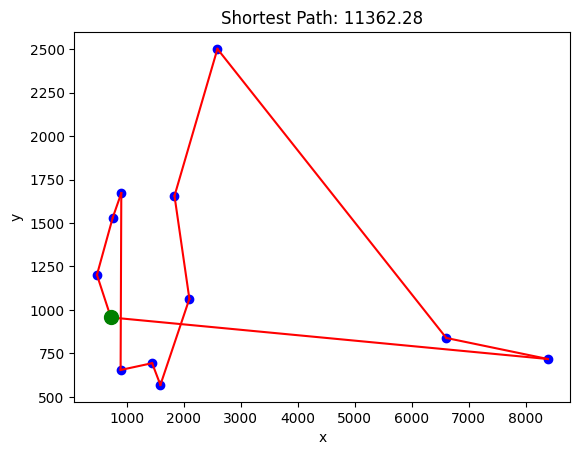

In [11]:
plot_solution(cities, shortest_path, shortest_distance, start_index=3)